In [62]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import librosa
import soundfile as sf
import os
from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy import stats
import wave, sys
from math import e

In [63]:
##########################2.1A
d = 0.08
N = 7
fs = 48000
theta = np.pi/4 #45 degrees in radians
c = 340 # speed of sound in m/s
tn = []

#We read each audio file and putting it to variables
#We did not choose to save the signals in a list 
#because it was making our exercise implementation more complicating
audio0 = librosa.load("sensor_0.wav", fs)[0]
audio1 = librosa.load("sensor_1.wav", fs)[0]
audio2 = librosa.load("sensor_2.wav", fs)[0]
audio3 = librosa.load("sensor_3.wav", fs)[0]
audio4 = librosa.load("sensor_4.wav", fs)[0]
audio5 = librosa.load("sensor_5.wav", fs)[0]
audio6 = librosa.load("sensor_6.wav", fs)[0]
audio7 = librosa.load("source.wav", fs)[0]

length = len(audio7)

t = np.linspace(0, length / fs, length)
w = np.linspace(0,2*np.pi, length)

for n in range(7):
    tn.append(-(n-3) * d * np.cos(theta)/c)
    
gg = np.exp(-1j * w, dtype = complex)

hds = (1/N)*(np.array([gg ** tn[0], gg ** tn[1], gg ** tn[2], gg ** tn[3], gg ** tn[4], gg ** tn[5], gg ** tn[6]]))

#Implementing the time-shift operation for each fft-ed signal
dft_audio0 = np.multiply(np.fft.fft(audio0, length), np.exp(tn[0] * w * fs * 1j, dtype=complex))
dft_audio1 = np.multiply(np.fft.fft(audio1, length), np.exp(tn[1] * w * fs * 1j, dtype=complex))
dft_audio2 = np.multiply(np.fft.fft(audio2, length), np.exp(tn[2] * w * fs * 1j, dtype=complex))
dft_audio4 = np.multiply(np.fft.fft(audio4, length), np.exp(tn[4] * w * fs * 1j, dtype=complex))
dft_audio5 = np.multiply(np.fft.fft(audio5, length), np.exp(tn[5] * w * fs * 1j, dtype=complex))
dft_audio6 = np.multiply(np.fft.fft(audio6, length), np.exp(tn[6] * w * fs * 1j, dtype=complex))

#Inversing the results from the previous operation
inverse_dft_audio0 = (np.fft.ifft(dft_audio0))
inverse_dft_audio1 = (np.fft.ifft(dft_audio1))
inverse_dft_audio2 = (np.fft.ifft(dft_audio2))
inverse_dft_audio4 = (np.fft.ifft(dft_audio4))
inverse_dft_audio5 = (np.fft.ifft(dft_audio5))
inverse_dft_audio6 = (np.fft.ifft(dft_audio6))

#Taking the real part from the sum of the previous results plus the signal from the middle microphone
exit = np.real(audio3 + inverse_dft_audio0 + inverse_dft_audio1 + inverse_dft_audio2 + inverse_dft_audio4 + inverse_dft_audio5 + inverse_dft_audio6)/N

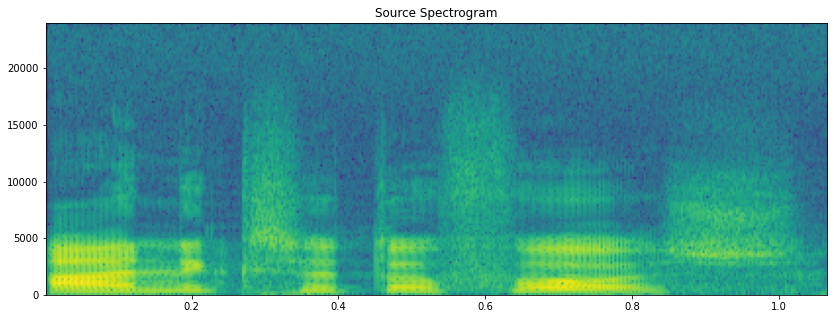

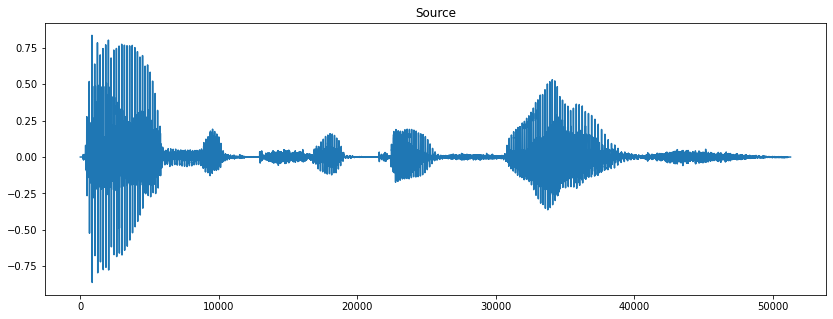

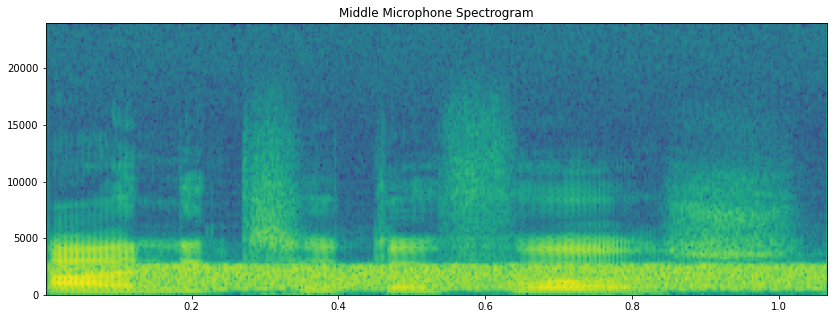

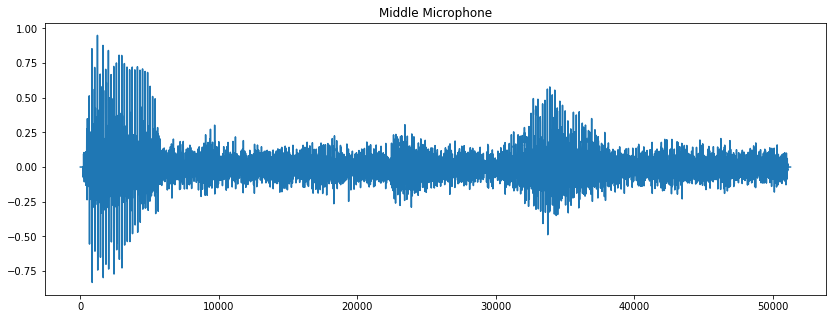

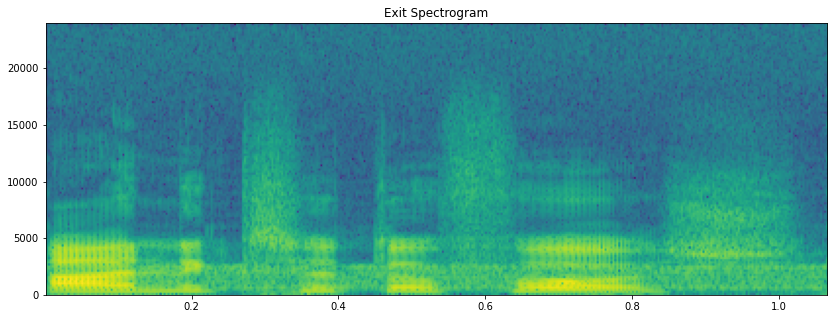

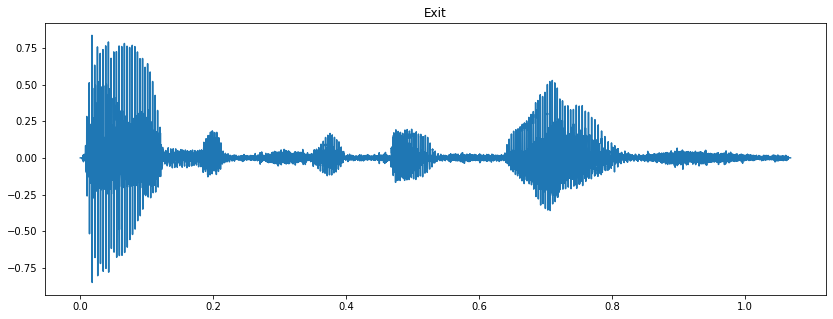

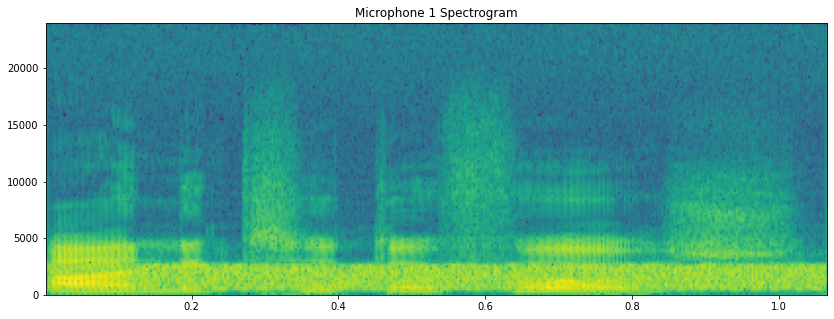

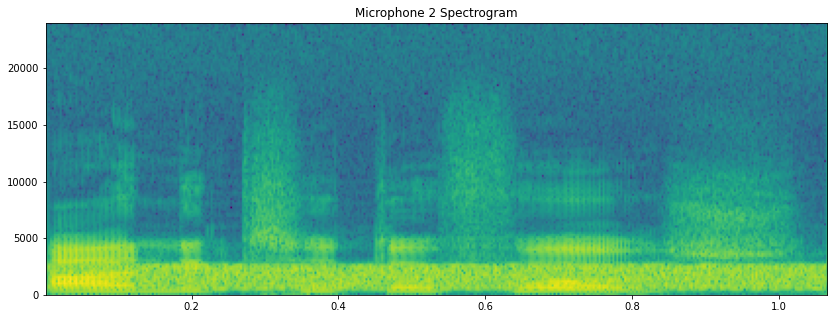

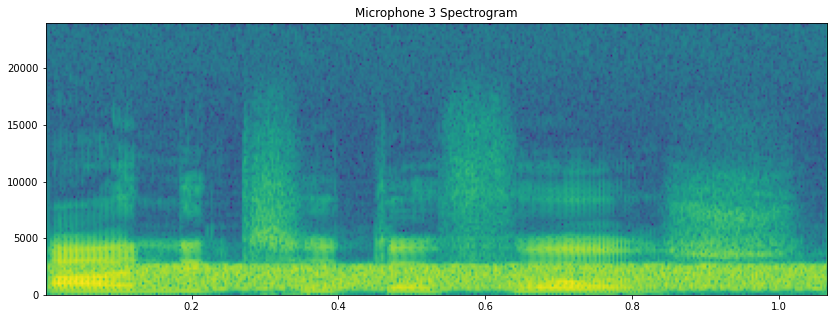

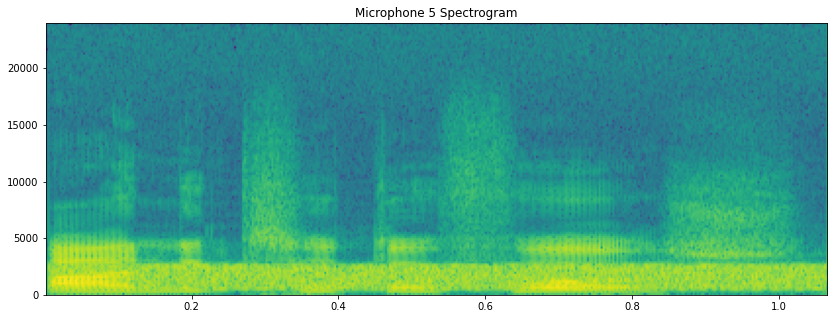

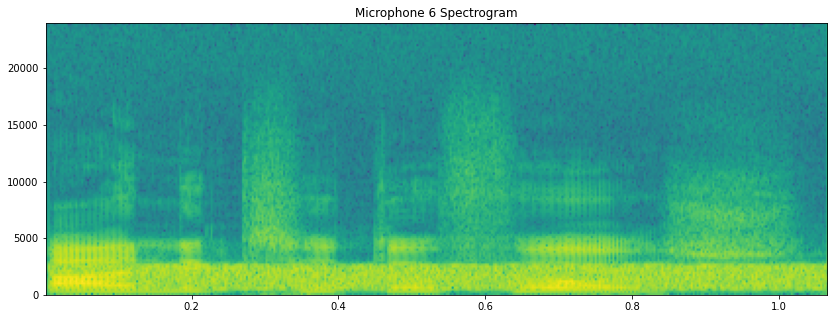

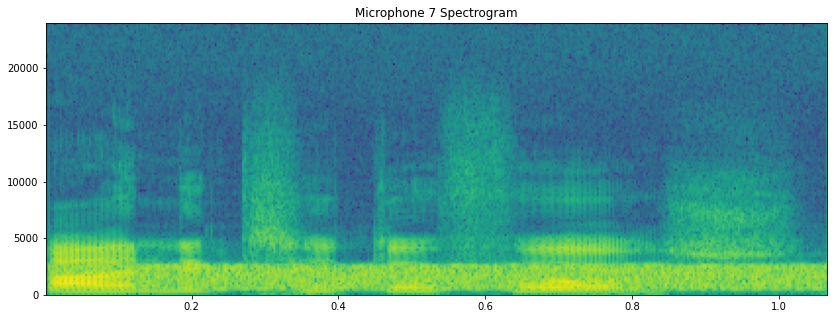

In [64]:
#Presenting the results of 2.1A - 1 and 2
plt.figure(figsize = (14, 5))
plt.title('Source Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio7, Fs = fs)

plt.figure(figsize = (14, 5))
plt.title('Source')
plt.plot(audio7)

plt.figure(figsize = (14, 5))
plt.title('Middle Microphone Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio3, Fs = fs)

plt.figure(figsize = (14, 5))
plt.title('Middle Microphone')
plt.plot(audio3)

plt.figure(figsize = (14, 5))
plt.title('Exit Spectrogram')
Pxx, freqs, bins, im = plt.specgram(exit, Fs = fs)

plt.figure(figsize = (14, 5))
plt.title('Exit')
plt.plot(t, exit)

#create a audio file for the beamforming exit
sf.write('sim_ds.wav', exit, fs)


#Creating the spectogram for every other microphone (OPTIONAL)
plt.figure(figsize = (14, 5))
plt.title('Microphone 1 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio0, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 2 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio1, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 3 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio2, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 5 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio4, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 6 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio5, Fs = fs)
plt.figure(figsize = (14, 5))
plt.title('Microphone 7 Spectrogram')
Pxx, freqs, bins, im = plt.specgram(audio6, Fs = fs)


In [65]:
###########Calculation of the SNR (2.1A - 3)
noise_middle = audio3 - audio7
noise_beam = exit - audio7

SNR_middle = 10 * np.log10(sum(audio7 ** 2) / sum(noise_middle ** 2))
SNR_beam = 10 * np.log10(sum(audio7 ** 2) / sum(noise_beam ** 2))

General_SNR = SNR_beam/SNR_middle

SNR of middle sensor signal: 2.9999999759490685
SNR of exit y(t) signal: 20.382190062342502
General SNR of mean and middle: 6.794063408582018


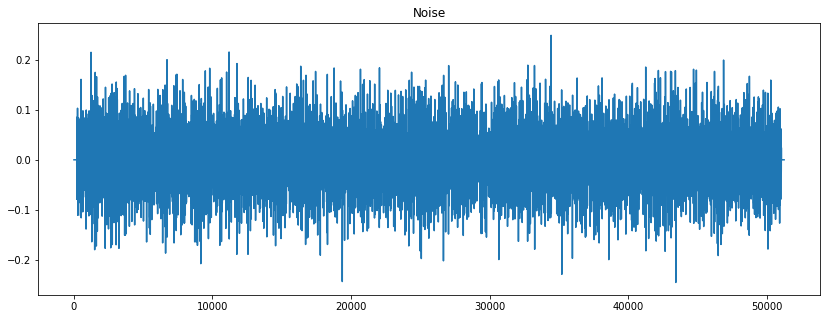

In [66]:
#Presenting the result of 2.1A - 3
sf.write('noise.wav', noise_middle, fs)


#Plotting the noise signal (OPTIONAL)
plt.figure(figsize = (14, 5))
plt.title('Noise')
plt.plot(noise_middle)


sf.write('noise_new.wav', noise_beam, fs)

print('SNR of middle sensor signal: ' 
      + str(SNR_middle) 
      + '\nSNR of exit y(t) signal: ' 
      + str(SNR_beam)
      + '\nGeneral SNR of mean and middle: ' 
      + str(General_SNR))

In [67]:
##########################2.1B
samples = fs * (0.50 - 0.47)
arithmos_plaisiou = 0.47 / (0.50 - 0.47)
pl_start = int((samples * arithmos_plaisiou) + 1)
pl_end = int((arithmos_plaisiou + 1) * samples)
center_mic = audio3
noise_middle = audio7 - audio3
source = audio7
xt = center_mic[int(0.47 * fs):int(0.5*fs)]
st = noise_middle[int(0.47 * fs):int(0.5*fs)]

f1, XT = sp.signal.welch(xt, fs = fs, nperseg = 1440, detrend=False, return_onesided=False)
f2, ST = sp.signal.welch(st, fs = fs, nperseg = 1440, detrend=False, return_onesided=False) 

hw = 1 - (ST / XT)
hw_log = 10*np.log10(hw)

nw = abs(1 - hw)**2
nw_log = 10*np.log10(nw)

#s(t)
ST_log = 10*np.log10(ST)

#x(t)
XT_log = 10*np.log10(XT)

#y(t)
xt_dft = np.fft.fft(xt)
#for i in range(1201,1440):
#    hw[i] = hw[1200]
hw[1200:1440] = hw[1200]
wiener_out = hw*xt_dft
xt_inverse = ifft(wiener_out)
f3, XT_DFT = sp.signal.welch(xt_inverse, fs = fs, detrend=False, return_onesided=False)
XT_DFT_log = 10*np.log10(XT_DFT)

#u(t)
ut = xt - st
f4, UT = sp.signal.welch(ut, fs = fs, detrend=False, return_onesided=False)
UT_log = 10*np.log10(UT)

<ipython-input-67-0381b908ba85>:16: RuntimeWarning: invalid value encountered in log10
  hw_log = 10*np.log10(hw)
<ipython-input-67-0381b908ba85>:19: RuntimeWarning: divide by zero encountered in log10
  nw_log = 10*np.log10(nw)
<ipython-input-67-0381b908ba85>:22: RuntimeWarning: divide by zero encountered in log10
  ST_log = 10*np.log10(ST)


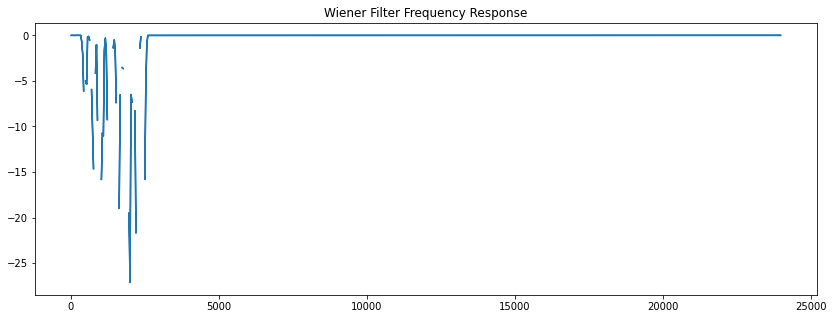

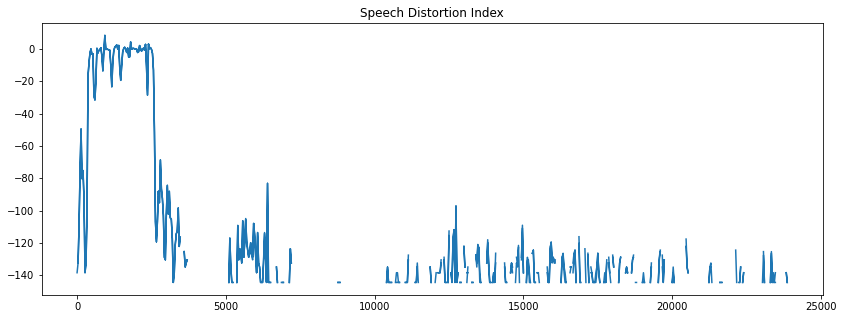

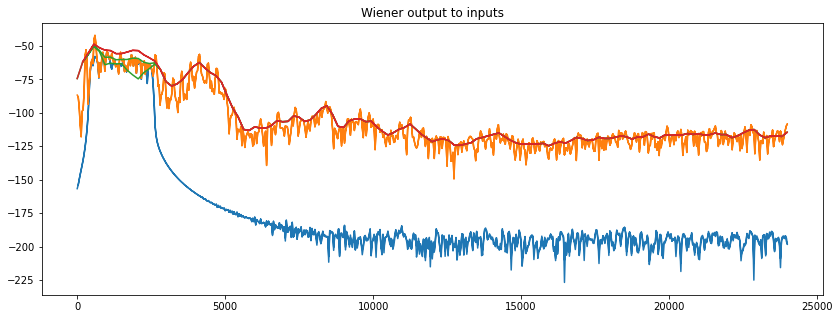

In [68]:
#Plot the reults
plt.figure(figsize = (14, 5))
plt.title('Wiener Filter Frequency Response')
plt.plot(abs(f1), hw_log)

plt.figure(figsize = (14, 5))
plt.title('Speech Distortion Index')
plt.plot(abs(f1), nw_log)

plt.figure(figsize = (14, 5))
plt.title('Wiener output to inputs')
plt.plot(abs(f2), ST_log, abs(f1), XT_log, abs(f3), XT_DFT_log, abs(f4), UT_log)